<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Lewandowski/Drzewa%20decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ładowanie danych Iris
data = datasets.load_iris()

# Tworzenie DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Dodawanie kolumny z etykietami klas
df['target'] = data.target

# Zamiana wartości numerycznych klas na nazwy
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Wyświetlenie kilku pierwszych wierszy DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


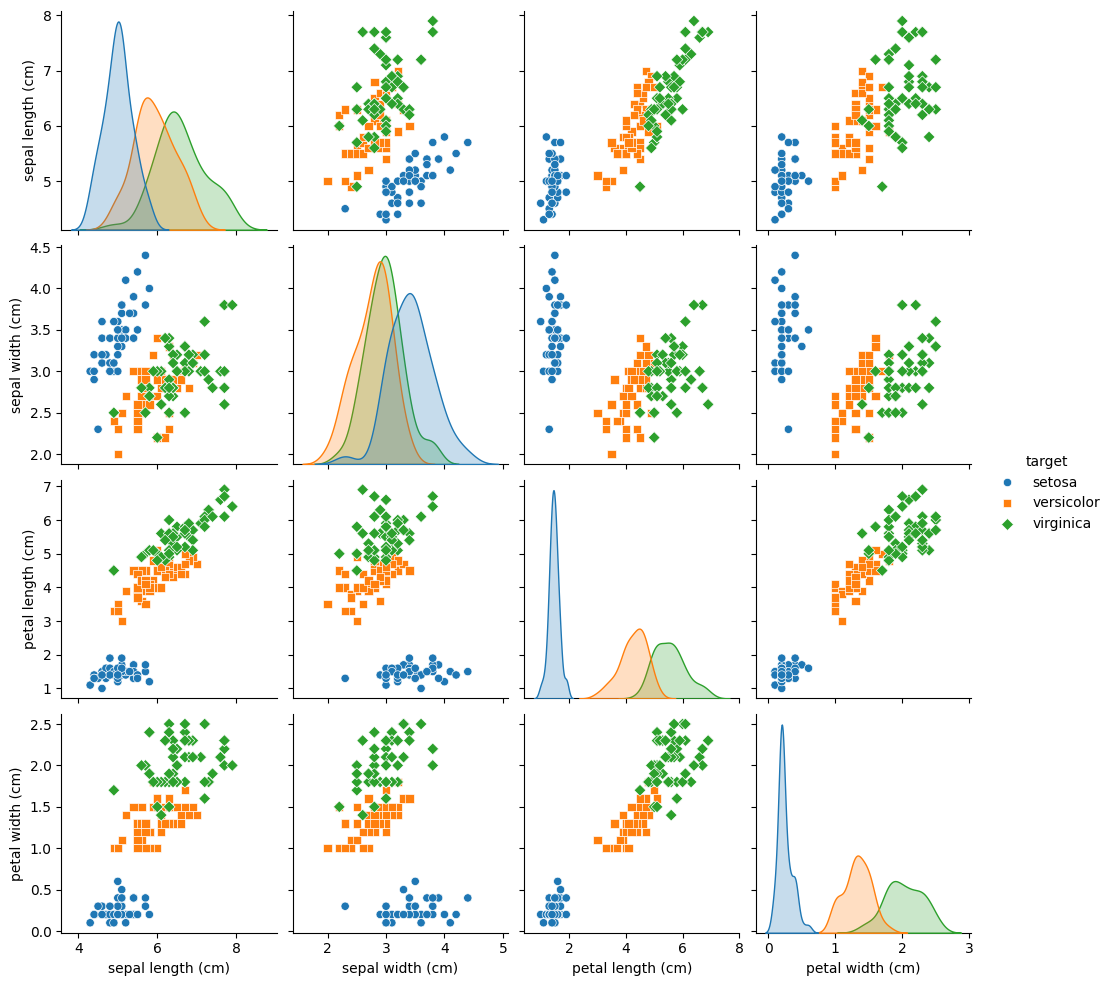

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [ ]:
# Wizualizacja danych
sns.pairplot(df, hue='target', markers=['o', 's', 'D'], diag_kind='kde')
plt.show()
print(df.columns)

In [ ]:
# Obliczenie liczby próbek dla każdej klasy
class_counts = df['target'].value_counts()

# Obliczenie prawdopodobieństw dla każdej klasy
class_probabilities = class_counts / len(df)

print("Prawdopodobieństwa wystąpienia danej klasy:")
print(class_probabilities)

Prawdopodobieństwa wystąpienia danej klasy:
target
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: count, dtype: float64


In [ ]:
def entropy(probabilities):
    entropy_value = 0
    for prob in probabilities:
        entropy_value -= prob * np.log2(prob)
    return entropy_value

# Obliczenie entropii
entropy_value = entropy(class_probabilities)

print("Entropia wynosi:", entropy_value)

Entropia wynosi: 1.584962500721156


In [ ]:
# Podział danych na dwie grupy na podstawie wartości petal width
group1 = df[df['petal width (cm)'] <= 0.5]
group2 = df[df['petal width (cm)'] > 0.5]
# Obliczenie liczby próbek dla każdej grupy
group1_counts = group1['target'].value_counts()
group2_counts = group2['target'].value_counts()

# Obliczenie prawdopodobieństw dla każdej klasy w każdej grupie
group1_probabilities = group1_counts / len(group1)
group2_probabilities = group2_counts / len(group2)

# Obliczenie entropii dla każdej grupy
entropy_group1 = entropy(group1_probabilities.values)
entropy_group2 = entropy(group2_probabilities.values)

# Obliczenie entropii całkowitej po podziale na poziomie 0.5 petal width
total_samples = len(df)
entropy_total = (len(group1) / total_samples) * entropy_group1 + (len(group2) / total_samples) * entropy_group2

print("Entropia po podziale na poziomie 0.5 petal width wynosi:", entropy_total)

Entropia po podziale na poziomie 0.5 petal width wynosi: 0.7206249385363921


In [ ]:
# Obliczenie entropii dla oryginalnego zbioru danych
original_entropy = entropy(class_probabilities.values)

# Obliczenie zysku informacyjnego
information_gain = original_entropy - entropy_total

print("Zysk informacyjny po podziale na poziomie 0.5 petal width wynosi:", information_gain)

Zysk informacyjny po podziale na poziomie 0.5 petal width wynosi: 0.864337562184764


In [ ]:
# Podział danych na dwie grupy na podstawie wartości petal width
group3 = df[df['petal width (cm)'] <= 0.38]
group4 = df[df['petal width (cm)'] > 0.38]

# Obliczenie liczby próbek dla każdej grupy
group3_counts = group3['target'].value_counts()
group4_counts = group4['target'].value_counts()

# Obliczenie prawdopodobieństw dla każdej klasy w każdej grupie
group3_probabilities = group3_counts / len(group3)
group4_probabilities = group4_counts / len(group4)

# Obliczenie entropii dla każdej grupy
entropy_group3 = entropy(group3_probabilities.values)
entropy_group4 = entropy(group4_probabilities.values)

# Obliczenie entropii całkowitej po podziale na poziomie 0.5 petal width
total_samplesa = len(df)
entropy_totala = (len(group3) / total_samples) * entropy_group3 + (len(group4) / total_samples) * entropy_group4

print("Entropia po podziale na poziomie 0.38 petal width wynosi:", entropy_totala)

Entropia po podziale na poziomie 0.38 petal width wynosi: 0.9654476494015447


In [ ]:
# Obliczenie zysku informacyjnego
information_gain = original_entropy - entropy_totala
print("Zysk informacyjny po podziale na poziomie 0.5 petal width wynosi:", information_gain)
print("Zysk informacyjny po podziale na poziomie 0.38 petal width wynosi:", information_gain)

Zysk informacyjny po podziale na poziomie 0.5 petal width wynosi: 0.6195148513196114
Zysk informacyjny po podziale na poziomie 0.38 petal width wynosi: 0.6195148513196114


In [ ]:
# Podział danych na zbiory testowe i uczące
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.3)

# Tworzenie drzewa decyzyjnego
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Przewidywany wynik dokładności
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Dokładność danych uczących:", accuracy_score(y_true=y_train, y_pred=y_pred_train))
print("Dokładność danych testowych:", accuracy_score(y_true=y_test, y_pred=y_pred_test))

Dokładność danych uczących: 1.0
Dokładność danych testowych: 0.9555555555555556


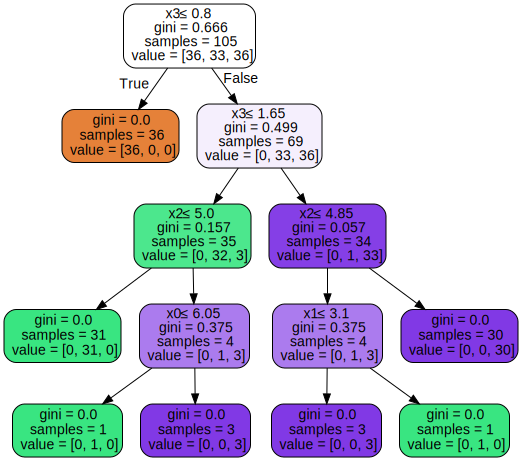

In [ ]:
# Generowanie graficznego modelu drzewa decyzyjnego
dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree")

graph